In [1]:
import pandas as pd

In [38]:
from ipyfilechooser import FileChooser
from IPython.display import display
# Create a file chooser
fc = FileChooser('data/')
display(fc)

# Button to load the selected file
def load_data(b):
    global df
    data_path = fc.selected
    if data_path:
        df = pd.read_csv(data_path, sep=',', usecols=['Setting', 'Timestamp', 'Channel_0', 'Channel_1', 'Channel_2', 'Channel_3'])
        display(df.head())

fc.register_callback(load_data)
# click on the output and use Alt+delete to clear and choose again

FileChooser(path='D:\code\uom_explore\data', filename='', title='', show_hidden=False, select_desc='Select', c…

,Setting,Timestamp,Channel_0,Channel_1,Channel_2,Channel_3
0,250,27507,11389,378,17648,16843
1,250,28792,10354,376,17648,16852
2,250,30076,10009,379,17648,16854
3,250,31363,9837,378,17648,16855
4,250,32650,9740,376,17648,16855


In [39]:
import matplotlib.pyplot as plt

# Group the data by 'Setting'
grouped = df.groupby('Setting', as_index=False)  # Keep 'Setting' as a column, not as an index

# Normalize the timestamps in each group
def normalize_timestamps(group):
    group['Timestamp'] = group['Timestamp'] - group['Timestamp'].iloc[0]
    return group

# Apply the normalization function to each group
df_normalized = grouped.apply(normalize_timestamps).reset_index(drop=False)

# Group the normalized DataFrame again for plotting
grouped_normalized = df_normalized.groupby('Setting')



C:\Users\gavin\AppData\Local\Temp\ipykernel_37820\2224914653.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_normalized = grouped.apply(normalize_timestamps).reset_index(drop=False)


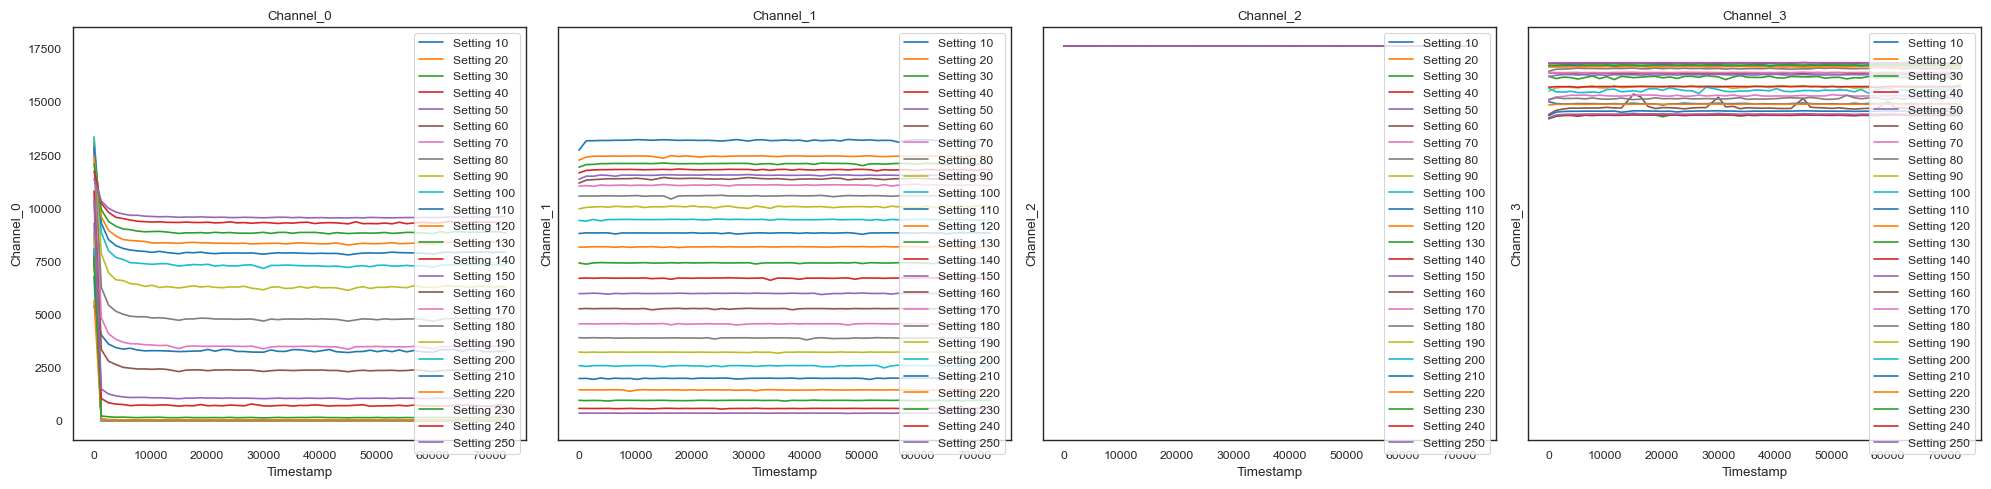

In [40]:
# Create a figure with subplots (one row, four columns)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

# Titles for each subplot
channels = ['Channel_0', 'Channel_1', 'Channel_2', 'Channel_3']
for i, channel in enumerate(channels):
    axs[i].set_title(channel)

# Plotting each channel in its subplot
for name, group in grouped_normalized:
    for i, channel in enumerate(channels):
        axs[i].plot(group['Timestamp'], group[channel], label=f'Setting {name}')
        axs[i].set_xlabel('Timestamp')
        axs[i].set_ylabel(channel)

# Add legends and adjust layout
for ax in axs:
    ax.legend()

plt.tight_layout()
plt.show()

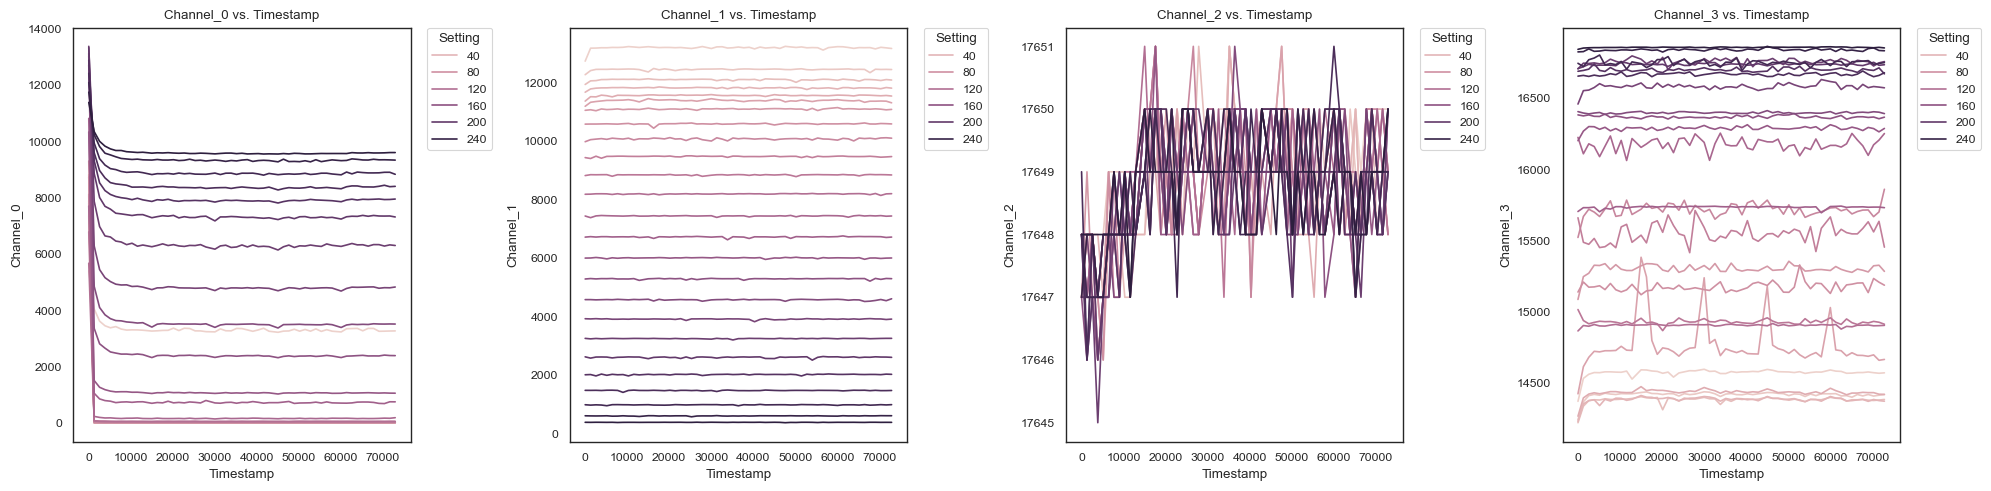

In [41]:
# plot in seaborn
import seaborn as sns


# Define a distinct color palette for 10 categories
palette = sns.color_palette("tab10", 10)

sns.set_theme(style='white', palette=palette, context="paper")
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=False)

# List of channels to plot
channels = ['Channel_0', 'Channel_1', 'Channel_2', 'Channel_3']

# Plot each channel
for i, channel in enumerate(channels):
    sns.lineplot(data=df_normalized, x='Timestamp', y=channel, hue='Setting', ax=axs[i])
    axs[i].set_title(f'{channel} vs. Timestamp')
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(channel)
    # axs[i].legend(title='Setting', loc='upper right')
    axs[i].legend(title='Setting', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Adjust layout
plt.tight_layout()
plt.show()

In [43]:
# use plotly to explore the data interactively
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assume df_normalized is your DataFrame and is properly formatted

# Define the figure with subplots
fig = make_subplots(rows=1, cols=4, shared_yaxes=False)

# List of channels to plot
channels = ['Channel_0', 'Channel_1', 'Channel_2', 'Channel_3']

# # Using a color palette from Plotly for 10 categories
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
#           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot each channel in its respective subplot
for i, channel in enumerate(channels):
    for setting in df_normalized['Setting'].unique():
        # Filter the DataFrame for each setting
        df_filtered = df_normalized[df_normalized['Setting'] == setting]
        fig.add_trace(
            go.Scatter(
                x=df_filtered['Timestamp'],
                y=df_filtered[channel],
                mode='lines',
                name=f'Setting {setting}',
                # line=dict(color=colors[setting % len(colors)])  # Loop through colors cyclically
            ),
            row=1, col=i+1
        )

    # Set titles and axes labels
    fig.update_xaxes(title_text='Timestamp', row=1, col=i+1)
    fig.update_yaxes(title_text=channel, row=1, col=i+1)
    fig.update_layout(height=500, width=2000, title_text=f'{channel} vs. Timestamp')

# Improve layout and display figure
fig.update_layout(title_text="Channel Readings Over Time", showlegend=True)
fig.show()
